Title: K-Means Algorithm from Scratch
Slug: k-means-from-scratch-python
Summary: Explanation of K-Means clustering algorithm, an easy-to-understand library K-Means library built from "scratch" in Python, and implementation of K-Means with a simple example
Date: 2018-12-2 10:10  
Category: Machine Learning
Subcategory: Clustering
Tags: clustering, object oriented programming, math, dictionaries, lists, functions
Keywords: kmeans from scratch python
Authors: Dan Friedman

### Intro to Clustering

Clustering is an unsupervised machine learning method that segments similar data points into groups.

It's considered unsupervised because there's no ground truth value to predict. Instead, we're trying to create structure/meaning from the data.

In this tutorial, we'll walk through the code of the K-Means clustering algorithm.

### K-Means Clustering Explanation

K-Means is a fairly reasonable clustering algorithm to understand. The steps are outlined below.

1) Assign `k` value as the number of desired clusters.

2) Randomly assign centroids of clusters from points in our dataset.

3) Assign each dataset point to the nearest centroid based on the Euclidean distance metric; this creates **clusters**.
    - Euclidean distance computes the distance between two objects using the Pythagorean Theorem. If you walked three blocks North and four blocks West, your Euclidean distance is five blocks.
    
4) Move centroids to the mean value of the clustered dataset points.

5) Iterate/repeat steps 3-4 until centroids don't move or we reach our maximum number of iterations allowed (called **convergence**).

Optionally, you could repeat steps 2-5 a fixed number of times (such as 10). With each new random initialization of centroids, you may get slightly different results. With different results, you'll likely have different centroids and slightly different dataset points in each cluster.

But how do you measure the success of running steps 2-5? With each run of steps 2-5 you can measure the **inertia**. Inertia is the sum of squares for all dataset points to their closest centroid. You can measure inertia after each convergence.

If you repeat steps 2-5 multiple times and measure the inertia each time, the optimal clusters are the final assignments with the smallest inertia.

### Why I Wrote K-Means from Scratch

I thought it'd be fun, and it was! I also wanted to understand step by step how it worked and get practice working with the code behind complex algorithms.

The foundations behind *relatively* simple machine learning algorithms such as K-Means for clustering, linear regression for regression, and logistic regression for classification are widespread in other algorithms and in deep learning. I plan to code more of these *relatively* simple algorithms in the future.

### My K-Means Library Versus Sci-kit Learn Library

Disclaimer: the code below is nowhere near as feature-rich or performant as the algorithm in the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html' rel='nofollow'>sklearn library</a>. However, it is fairly easy to read, understand and can help you better understand the math used in many clustering algorithms.

### Code K-Means Algorithm From Scratch

#### Import Modules

In [11]:
import logging
import numpy
import random
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
% matplotlib inline

#### Define Logging Format

In [12]:
logging.basicConfig(format='%(asctime)s - %(lineno)s - %(funcName)s - %(levelname)s - %(message)s', level=logging.DEBUG)

#### Set Visualization Styles

In [13]:
sns.set_context('talk')

#### Visualization of Simple Dataset

Our dataset points.

In [14]:
points = numpy.array([[1, 2], [3, 2], [4, 5], [6, 5]])

Call on the `scatter` method on our pyplot object and pass in our list of x-values, y-values and a single color for all our points.

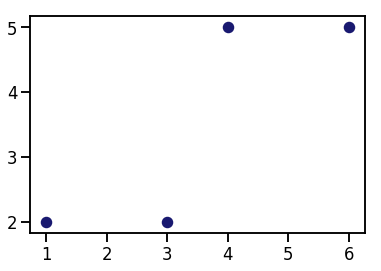

In [15]:
plt.scatter(points[:, 0], points[:, 1], s=100, color='midnightblue');

#### KMeans Class

In [16]:
class KMeans(object):
    """
    Calculations associated with K-Means clustering on a set of n-dimensional data points to find clusters - closely
    located groups - of dataset points.
    """
    def __init__(self, dataset_numpy_array, k_number_of_clusters, number_of_centroid_initializations,
                 max_number_of_iterations=30):
        """
        Attributes associated with all K-Means clustering of data points
        :param dataset_numpy_array: numpy array of n-dimensional points you'd like to cluster
        :param k_number_of_clusters: number of clusters to create
        :param max_number_of_iterations: maximum number of possible iterations to run K-Means
        """
        self.dataset = dataset_numpy_array
        self.k_number_of_clusters = k_number_of_clusters
        self.number_of_instances, self.number_of_features = self.dataset.shape
        self.number_of_centroid_initializations = number_of_centroid_initializations
        self.inertia_values = []
        self.max_number_of_iterations = max_number_of_iterations
        self.clusters_all_iterations_record = []  # all centroids and clustered dataset points

    @staticmethod
    def get_euclidean_distance(n_dimensional_numpy_array_0, n_dimensional_numpy_array_1):
        """
        Static method to calculate the normalized Euclidean distance between any n-dimensional numpy arrays
        :param n_dimensional_numpy_array_0: one n-dimensional numpy array (aka a point in space)
        :param n_dimensional_numpy_array_1: another n-dimensional numpy array (aka a point in space)
        :return: magnitude of Euclidean distance between two n-dimensional numpy arrays; scalar value
        """
        return numpy.linalg.norm(n_dimensional_numpy_array_0 - n_dimensional_numpy_array_1)

    def create_random_initial_centroids(self):
        """
        Create random initial centroids based on dataset; creates # of centroids to match # of clusters
        :return:
        """
        random_dataset_indices = random.sample(range(0, self.number_of_instances), self.k_number_of_clusters)
        random_initial_centroids = self.dataset[random_dataset_indices]
        return random_initial_centroids

    def assign_dataset_points_to_closest_centroid(self, centroids):
        """
        Given any number of centroid values, assign each point to its closest centroid based on the Euclidean distance
        metric. Use data structure cluster_iteration_record to keep track of the centroid and associated points in a
        single iteration.
        :param centroids: numpy array of centroid values
        :return: record of centroid and associated dataset points in its cluster for a single K-Means iteration
        """
        logging.info("clustering dataset points to centroids...")
        cluster_single_iteration_record = defaultdict(list)
        for dataset_point in self.dataset:
            euclidean_distances_between_dataset_point_and_centroids = []
            for centroid in centroids:
                distance_between_centroid_and_dataset_point = self.get_euclidean_distance(centroid, dataset_point)
                logging.debug("Euclidean distance between dataset point {} and centroid {} is {}".format(
                    dataset_point, centroid, distance_between_centroid_and_dataset_point))
                euclidean_distances_between_dataset_point_and_centroids.append(distance_between_centroid_and_dataset_point)
            index_of_closest_centroid = numpy.argmin(euclidean_distances_between_dataset_point_and_centroids)
            closest_centroid = tuple(centroids[index_of_closest_centroid])
            logging.debug("dataset point {} is closest to centroid {}".format(dataset_point, centroid))
            logging.debug("dataset point {} now belongs to cluster with centroid {}".format(dataset_point, centroid))
            cluster_single_iteration_record[closest_centroid].append(dataset_point)
        logging.debug("cluster_single_iteration_record: {0}".format(cluster_single_iteration_record))
        return cluster_single_iteration_record

    def run_kmeans_initialized_centroid(self, initialization_number):
        """
        Assign dataset points to clusters based on nearest centroid; update centroids based on mean of cluster points.
        Repeat steps above until centroids don't move or we've reached max_number_of_iterations.

        :return: None
        """
        centroids = self.create_random_initial_centroids()
        logging.info("random initial centroids are {}".format(centroids))
        self.clusters_all_iterations_record.append([])  # list of record of iteration centroids and clustered points

        for iteration in range(1, self.max_number_of_iterations+1):
            logging.info("starting iteration number {}...".format(iteration))
            cluster_single_iteration_record = self.assign_dataset_points_to_closest_centroid(centroids=centroids)
            self.clusters_all_iterations_record[initialization_number].append(cluster_single_iteration_record)
            updated_centroids = []
            for centroid in cluster_single_iteration_record:
                cluster_dataset_points = cluster_single_iteration_record[centroid]
                logging.debug("calculating the mean of {} clustered dataset points associated with centroid {}".format(
                    len(cluster_dataset_points), centroid))
                updated_centroid = numpy.mean(cluster_dataset_points, axis=0)
                logging.info("mean of the clustered dataset points is the new centroid at {}".format(updated_centroid))
                updated_centroids.append(updated_centroid)
            logging.debug("check if we meet early stopping criteria...")
            if self.get_euclidean_distance(numpy.array(updated_centroids), centroids) == 0:
                logging.info("updated centroids {} are the same as previous iteration centroids {}".format(
                    updated_centroids, centroids))
                logging.info("we've reached convergence of centroid values; end clustering")
                break
            logging.debug("use new updated_centroids values for next iteration...")
            centroids = updated_centroids
        return None

    def fit(self):
        """
        Implements K-Means the max number_of_centroid_initializations times; each time, there's new initial centroids.
        :return: None
        """
        logging.info("perform K-Means {} times with new centroids at each start".format(self.number_of_centroid_initializations))
        for initialization_number in range(self.number_of_centroid_initializations):
            self.run_kmeans_initialized_centroid(initialization_number=initialization_number)

            # index of -1 is for the last cluster assignment of the iteration
            inertia_of_last_cluster_record = self.inertia(self.clusters_all_iterations_record[initialization_number][-1])
            self.inertia_values.append(inertia_of_last_cluster_record)
        return None

    def inertia(self, clusters):
        """
        Get the sum of squared distances of dataset points to their cluster centers for all clusters - defined as inertia
        :return: cluster_sum_of_squares_points_to_clusters
        """
        cluster_sum_of_squares_points_to_clusters = 0
        logging.debug("cluster points: {}".format(clusters))

        for centroid, cluster_points in clusters.items():
            logging.debug("the cluster has a centroid at: {}".format(centroid))

            logging.debug("calculate sum of squares from centroid to all points in that cluster...")
            for cluster_point in cluster_points:
                euclidean_norm_distance = self.get_euclidean_distance(cluster_point, centroid)
                euclidean_norm_distance_squared = euclidean_norm_distance**2
                logging.debug("squared euclidean dist from centroid {} to point {} is {}".format(centroid, cluster_point,
                                                                                                 euclidean_norm_distance_squared))
                cluster_sum_of_squares_points_to_clusters += euclidean_norm_distance_squared
        logging.info("inertia is: {}".format(cluster_sum_of_squares_points_to_clusters))
        return cluster_sum_of_squares_points_to_clusters

    def index_lowest_inertia_cluster(self):
        """
        In our list of inertia_values, finds the index of the minimum inertia
        :return: index_lowest_inertia
        """
        minimum_inertia_value = min(self.inertia_values)
        logging.debug("minimum_inertia_value: {}".format(minimum_inertia_value))
        index_lowest_inertia = self.inertia_values.index(minimum_inertia_value)
        logging.debug("index_lowest_inertia: {}".format(index_lowest_inertia))
        return index_lowest_inertia

    def final_iteration_optimal_cluster(self):
        """
        Get results of optimal cluster assignment based  on the lowest inertia value
        :return: dictionary with keys as centroids and values as list of dataset points in the clusters
        """
        # -1 gets us the final iteration from a centroid initialization of running K-Means
        return self.clusters_all_iterations_record[self.index_lowest_inertia_cluster()][-1]

    def final_iteration_optimal_cluster_centroids(self):
        """
        Get centroids of the optimal cluster assignment based on the lowest inertia value
        :return: list of tuples with tuples holding centroid locations
        """
        return list(self.final_iteration_optimal_cluster().keys())

    @staticmethod
    def plot_clusters(clusters, x_axis_label="", y_axis_label="", plot_title=""):
        """
        Static method to plot final cluster assignments if we only have 2 features from our dataset
        :param clusters: dictionary with centroids as keys and values as list of dataset points in that cluster
        :param x_axis_label: x axis label
        :param y_axis_label: y axis label
        :param plot_title: plot title
        :return: None
        """
        list_of_colors = ['firebrick', 'gold', 'navy', 'lightseagreen', 'deepskyblue', 'mediumpurple',
                          'darkmagenta', 'palevioletred', 'darkgreen',  'darkorange', 'darkslategray', 'dimgrey']
        color_index = 0
        for centroid, cluster_points in clusters.items():
            cluster_color = list_of_colors[color_index]
            x_values_index = 0
            y_values_index = 1

            logging.debug("plot centroid {} as {}".format(centroid, cluster_color))
            plt.scatter(centroid[x_values_index], centroid[y_values_index], color=cluster_color, s=500, alpha=0.5)

            logging.debug("create lists of x-values and y-values for cluster points...")
            cluster_points_x_values = [cluster_point[x_values_index] for cluster_point in cluster_points]
            cluster_points_y_values = [cluster_point[y_values_index] for cluster_point in cluster_points]
            
            logging.debug("plot dataset points in cluster with centroid {} as {}".format(centroid, cluster_color))
            plt.scatter(cluster_points_x_values, cluster_points_y_values, color=cluster_color, s=100, marker='o')

            color_index += 1
        plt.title(plot_title)
        plt.xlabel(x_axis_label)
        plt.ylabel(y_axis_label)
        plt.show()
        return None

    def predict(self, n_dimensional_numpy_array):
        """
        Predict which cluster a new point belongs to; calculates euclidean distance from point to all centroids
        :param n_dimensional_numpy_array: new observation that has same n-dimensions as dataset points
        :return: closest_centroid
        """
        # initially assign closest_centroid as large value; we'll reassign it later
        closest_centroid = numpy.inf
        for centroid in self.final_iteration_optimal_cluster_centroids():
            distance = self.get_euclidean_distance(centroid, n_dimensional_numpy_array)
            if distance < closest_centroid:
                closest_centroid = centroid
        return closest_centroid

### Implement K-Means on Original 4-Point Dataset

The beauty of logging statements is that for each message executed you can see:

- line number
- encapsulated function
- logging level
- text message

Below is the extensive logging messages for running my algorithm. Please ignore the strange colors. That's something I'll fix later.

2018-12-02 09:32:00,803 - 104 - fit - INFO - perform K-Means 1 times with new centroids at each start
2018-12-02 09:32:00,804 - 74 - run_kmeans_initialized_centroid - INFO - random initial centroids are [[4 5]
 [3 2]]
2018-12-02 09:32:00,805 - 78 - run_kmeans_initialized_centroid - INFO - starting iteration number 1...
2018-12-02 09:32:00,807 - 49 - assign_dataset_points_to_closest_centroid - INFO - clustering dataset points to centroids...
2018-12-02 09:32:00,808 - 56 - assign_dataset_points_to_closest_centroid - DEBUG - Euclidean distance between dataset point [1 2] and centroid [4 5] is 4.242640687119285
2018-12-02 09:32:00,810 - 56 - assign_dataset_points_to_closest_centroid - DEBUG - Euclidean distance between dataset point [1 2] and centroid [3 2] is 2.0
2018-12-02 09:32:00,811 - 60 - assign_dataset_points_to_closest_centroid - DEBUG - dataset point [1 2] is closest to centroid [3 2]
2018-12-02 09:32:00,812 - 61 - assign_dataset_points_to_closest_centroid - DEBUG - dataset point 

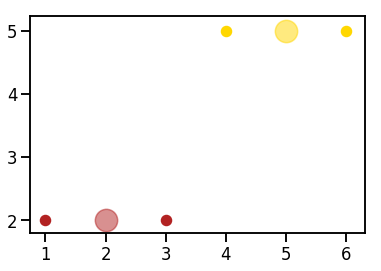

In [17]:
points = numpy.array([[1, 2], [3, 2], [4, 5], [6, 5]])
k_means_object = KMeans(dataset_numpy_array=points, k_number_of_clusters=2, number_of_centroid_initializations=1)
k_means_object.fit()
logging.info("inertia values: {0}".format(k_means_object.inertia_values))
index_lowest_inertia_cluster = k_means_object.index_lowest_inertia_cluster()
logging.info("lowest inertia value at centroid initialization #{}".format(index_lowest_inertia_cluster))
optimal_cluster_assignment = k_means_object.final_iteration_optimal_cluster()
logging.info("optimal_cluster_assignment: {}".format(optimal_cluster_assignment))
optimal_centroids = k_means_object.final_iteration_optimal_cluster_centroids()
logging.info("optimal centroids: {}".format(optimal_centroids))
k_means_object.plot_clusters(optimal_cluster_assignment)

### Plot History of K-Means Iterations (One Centroid Initialization)

In [18]:
iterations = 0
for centroid_initialization in k_means_object.clusters_all_iterations_record:
    for iteration in centroid_initialization:
        iterations+=1

2018-12-02 09:32:01,089 - 178 - plot_clusters - DEBUG - plot centroid (3, 2) as firebrick
2018-12-02 09:32:01,142 - 181 - plot_clusters - DEBUG - create lists of x-values and y-values for cluster points...
2018-12-02 09:32:01,143 - 185 - plot_clusters - DEBUG - plot dataset points in cluster with centroid (3, 2) as firebrick
2018-12-02 09:32:01,146 - 178 - plot_clusters - DEBUG - plot centroid (4, 5) as gold
2018-12-02 09:32:01,150 - 181 - plot_clusters - DEBUG - create lists of x-values and y-values for cluster points...
2018-12-02 09:32:01,151 - 185 - plot_clusters - DEBUG - plot dataset points in cluster with centroid (4, 5) as gold


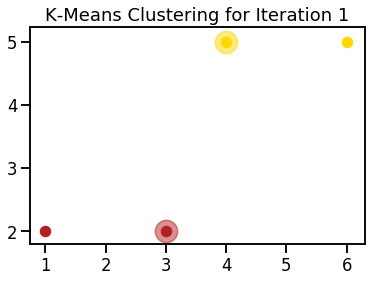

2018-12-02 09:32:01,254 - 178 - plot_clusters - DEBUG - plot centroid (2.0, 2.0) as firebrick
2018-12-02 09:32:01,297 - 181 - plot_clusters - DEBUG - create lists of x-values and y-values for cluster points...
2018-12-02 09:32:01,298 - 185 - plot_clusters - DEBUG - plot dataset points in cluster with centroid (2.0, 2.0) as firebrick
2018-12-02 09:32:01,301 - 178 - plot_clusters - DEBUG - plot centroid (5.0, 5.0) as gold
2018-12-02 09:32:01,304 - 181 - plot_clusters - DEBUG - create lists of x-values and y-values for cluster points...
2018-12-02 09:32:01,305 - 185 - plot_clusters - DEBUG - plot dataset points in cluster with centroid (5.0, 5.0) as gold


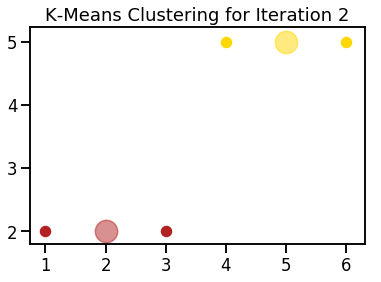

In [20]:
for centroid_initialization in k_means_object.clusters_all_iterations_record:
    for iteration_number, iteration in enumerate(centroid_initialization):
        k_means_object.plot_clusters(iteration, plot_title="K-Means Clustering for Iteration {}".format(iteration_number+1))